<a href="https://colab.research.google.com/github/sarah-abukhotti/python_projects/blob/main/Dimonds_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# upload the dataset

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('diamonds.csv')

# Now we print the first few rows of the dataframe
print(df.head())


Saving diamonds.csv to diamonds.csv
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


the data is mostly numerical, and the first column does not affect the analysis since it's just line counting so we will remove it.

there's an unneeded line with no actual relevent values, so we remove it




In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


see if there is any empty cells


In [7]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


 we get the summary of statistical information for numerical columns in the DataFrame


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


 we have 0 values in x, y, z


In [9]:
zero_count_x = df['x'].value_counts().get(0, 0)
print(f"Number of zeros in x: {zero_count_x}")
zero_count_y = df['y'].value_counts().get(0, 0)
print(f"Number of zeros in y: {zero_count_y}")
zero_count_z = df['z'].value_counts().get(0, 0)
print(f"Number of zeros in z: {zero_count_z}")

Number of zeros in x: 8
Number of zeros in y: 7
Number of zeros in z: 20


since the number of 0 in the columns is small  its not really important and won't affect the data negativaly to remove them


In [10]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


creating a plot that difines the relationship between 2 catagories at a time


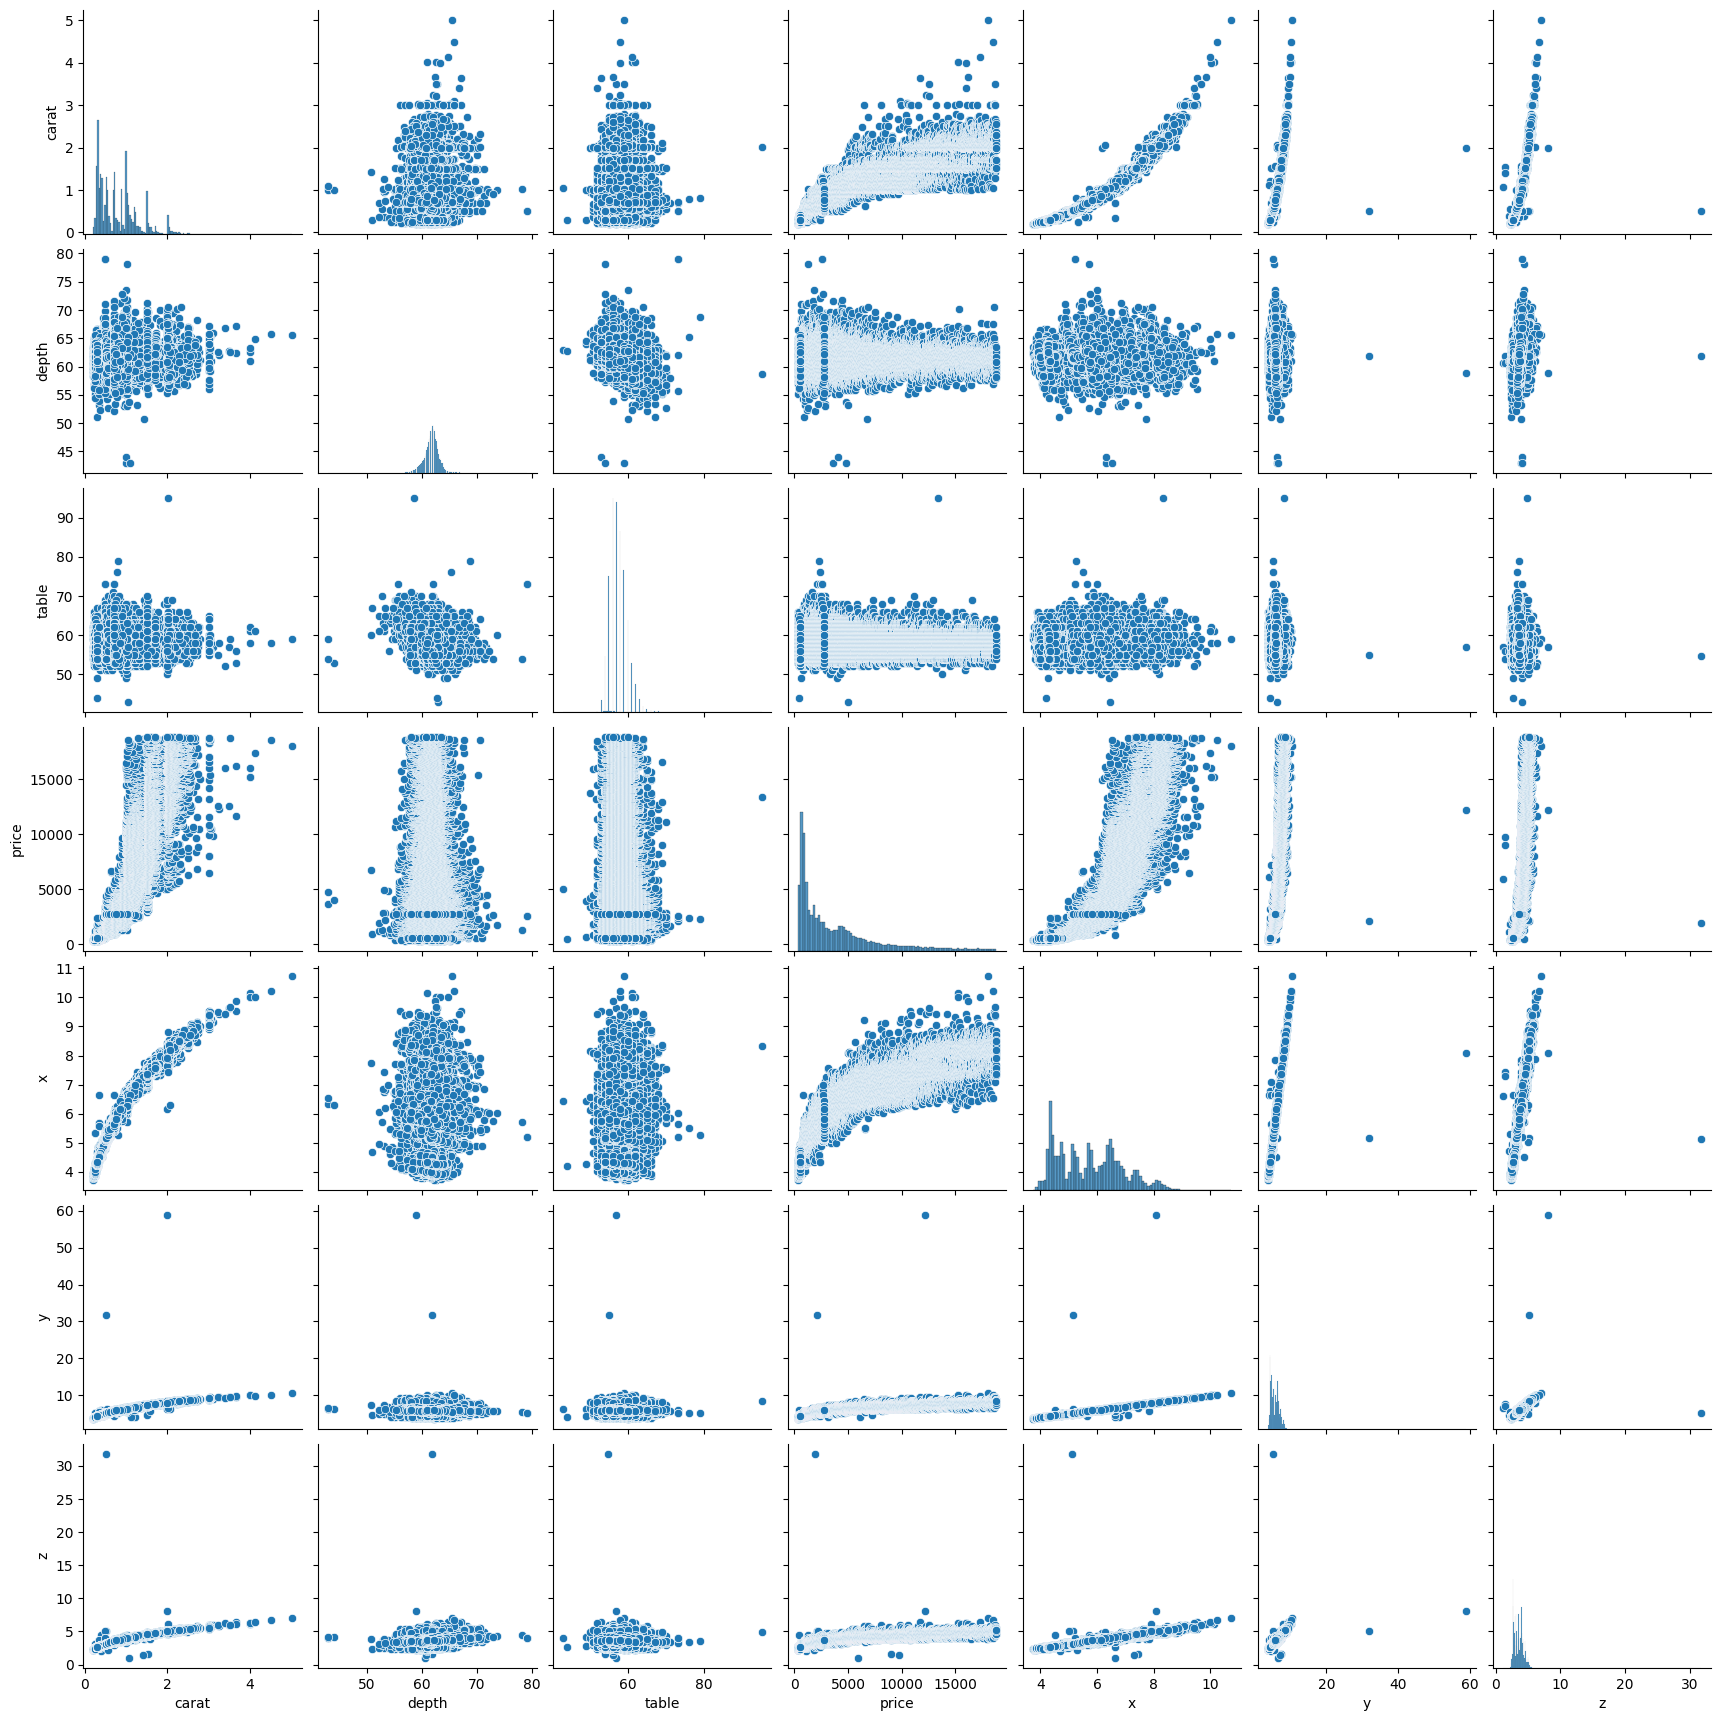

In [13]:
sns.pairplot(df)

In [14]:
# in the depth catagory we can see that the data is focused in between 50 and 75
df=df[(df["depth"]>49)&(df["depth"]<76)]
# in the table catagory we can see the data between maybe 45 and 80
df=df[(df["table"]>44)&(df["table"]<81)]
# since x has a small range I didn't thunk I would need to care about the outlier there
# since in y we have 2 outliers above 30 and 60 while all the other points are under 10, in x
df=df[(df["y"])<30]
# since the outlier in z is one point above 30 I think i can use any number bigger than the biggest point except the outlier
df=df[(df["z"]<12)]

we can find the data number of row * columns to understand what we are working with if needed or to check what changes we made

In [15]:
df.shape

(53908, 10)

we can represent catagorical data using bar plot as long as the catagories subcatagories are not big in number for better representation and clarity.

<Axes: xlabel='cut', ylabel='count'>

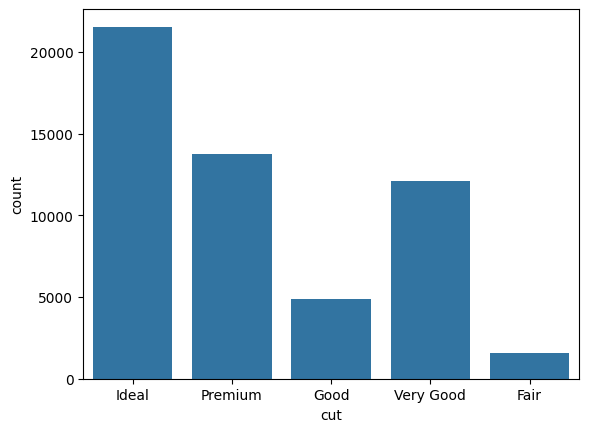

In [16]:
sns.countplot(x='cut',data=df)

<Axes: xlabel='clarity', ylabel='count'>

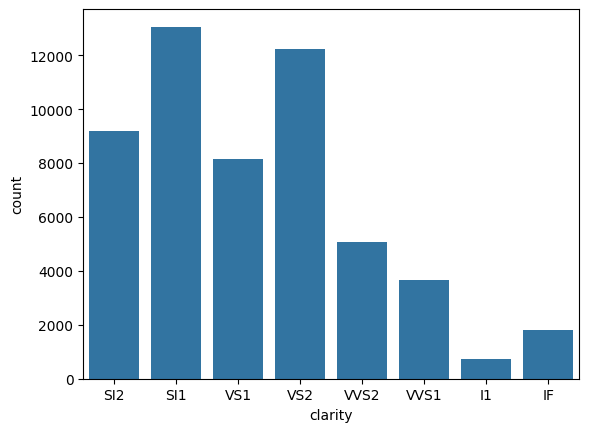

In [17]:
sns.countplot(x="clarity",data=df)

<Axes: xlabel='color', ylabel='count'>

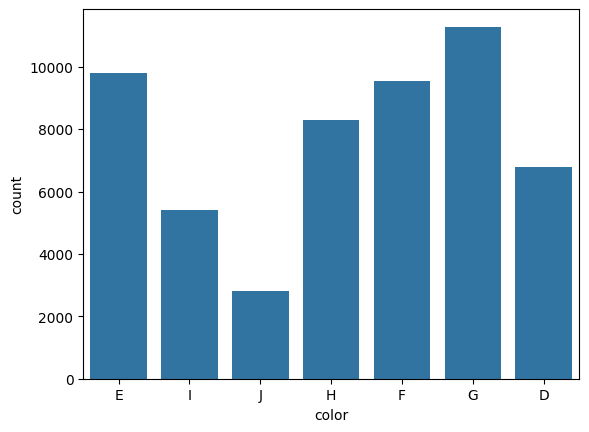

In [18]:
sns.countplot(x="color",data=df)

for analysis we can transform catagorical data into numerical values, by counting the number of repeatetion of the values

In [19]:
cut_mapping = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
df['cut'] = df['cut'].replace(cut_mapping)

<ipython-input-19-6dbea6b52cdd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cut'] = df['cut'].replace(cut_mapping)


In [20]:
clarity_mapping ={'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
df['clarity'] = df['clarity'].replace(clarity_mapping)

<ipython-input-20-e0f87a97cf03>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clarity'] = df['clarity'].replace(clarity_mapping)


In [21]:
color_mapping={'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
df['color']=df['color'].replace(color_mapping)

<ipython-input-21-399bb14a99c2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['color']=df['color'].replace(color_mapping)


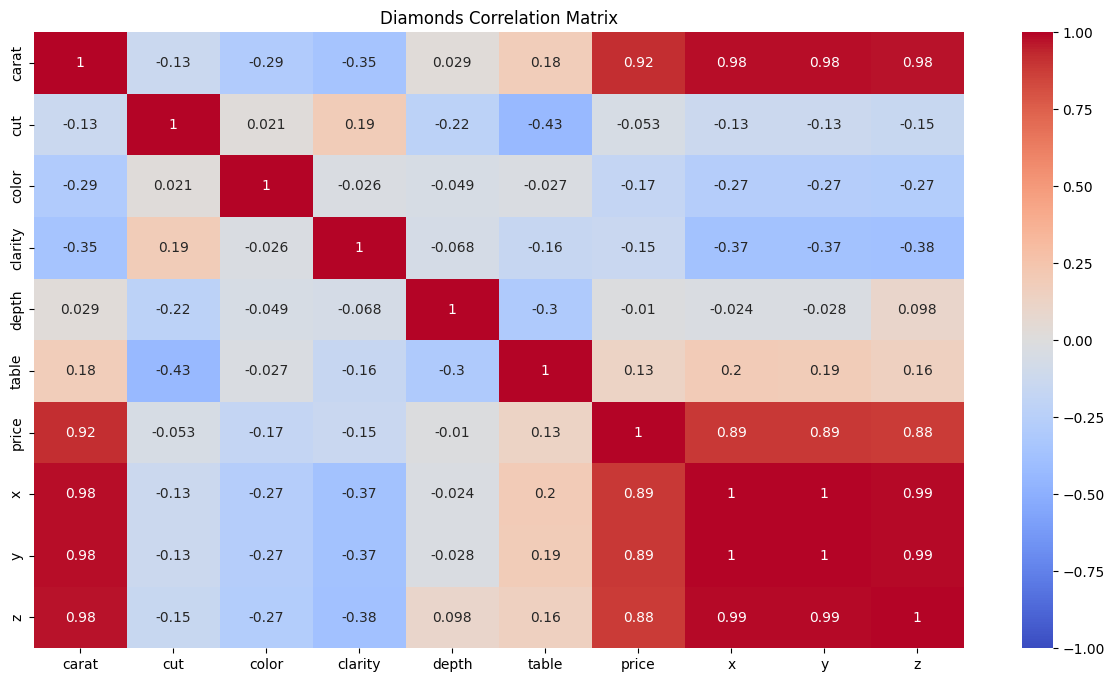

In [22]:
df_corr = df.copy()

# Create a correlation matrix
corr = df_corr.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Diamonds Correlation Matrix')
plt.show()

by analysing this correlation matrix we can assume:
- the correlation between the carat and cut is a moderate negative
- the correlation between the carat and color is a moderate negative
- the correlation between the carat and clarity is a moderate negative
- the correlation between the carat and price is a strong positive

dimensions:
- the correlation between the carat and depth is a moderate positive
- the correlation between the carat and table is a moderate positive
- the correlation between the carat and x is a strong positive
- the correlation between the carat and y is a strong positive
- the correlation between the carat and z is a strong positive

we have a positive linear relationship between x, y and nearly linear with z

maybe we can make x,y and z into a one catagory/feature (size)
and use a linear regrission model

In [25]:
size = df[['x', 'y', 'z']]
df['size'] = np.sqrt(size.pow(2).sum(axis=1))
price = df['price']

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,6.111285
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,5.934122
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,6.188982
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,6.515351
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,6.732058


splitting data into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(size, price, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3284750.523419821
R-squared: 0.7837632920639017


In [33]:
# Find the range of the 'price' column
price_max = df['price'].max()
price_min = df['price'].min()
price_range = df['price'].max() - df['price'].min()
print(price_max)
print(price_min)
price_range

18823
326


18497

from this since the prices vary between 326 to 18823 and it's range = 18497, while the MSE is 3284750.5, the difference in these value means that the model is not optimal for this data set and needs improvment.

R-squared show that the size has a significant impact on the price of the diamond
(78%)